In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import all the modules for model trining model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
#warning ignore
import warnings
warnings.filterwarnings('ignore')

#Load Breast cancer dataset to train model then predict

In [106]:
df=pd.read_csv('/content/Breast_cancer_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [107]:
#shape of datset
df.shape

(699, 10)

In [108]:
# Name columns for easier reference
Name_columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']
df.columns = Name_columns
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [109]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [110]:
# Convert 'Bare Nuclei' to numeric (if it's not already)
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [111]:
#data descriptio
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [112]:
#check the missing value
df.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,16
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [113]:
#drop missing value
df.dropna(inplace=True)

In [114]:
#check shape of data after treating null
df.shape

(683, 10)

In [115]:
df.dtypes

,0
Clump Thickness,int64
Uniformity of Cell Size,int64
Uniformity of Cell Shape,int64
Marginal Adhesion,int64
Single Epithelial Cell Size,int64
Bare Nuclei,float64
Bland Chromatin,int64
Normal Nucleoli,int64
Mitoses,int64
Class,int64


### ***Feature Engineering***

In [116]:
df['Adhesion to Epithelial Size'] = df['Marginal Adhesion'] / df['Single Epithelial Cell Size']
df['Chromatin to Nucleoli'] = df['Bland Chromatin'] / df['Normal Nucleoli']
df['Thickness to Mitoses'] = df['Clump Thickness'] / df['Mitoses']

In [117]:
df['Cell_Uniformity_Diff'] = df['Uniformity of Cell Size'] - df['Uniformity of Cell Shape']

In [118]:
# Create a new feature that is the average of cell size and shape uniformity
df['Cell_Uniformity_Avg'] = (df['Uniformity of Cell Size'] + df['Uniformity of Cell Shape']) / 2

In [119]:
# Polynomial transformation
df['Clump_Thickness_Squared'] = df['Clump Thickness'] ** 2

# Interaction term
df['Cell_Size_Shape_Interaction'] = df['Uniformity of Cell Size'] * df['Uniformity of Cell Shape']

# Non-linear transformation
df['Mitoses_Log'] = np.log(df['Mitoses'])

In [120]:
# Get the data types of each column
print(df.dtypes)

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
Adhesion to Epithelial Size    float64
Chromatin to Nucleoli          float64
Thickness to Mitoses           float64
Cell_Uniformity_Diff             int64
Cell_Uniformity_Avg            float64
Clump_Thickness_Squared          int64
Cell_Size_Shape_Interaction      int64
Mitoses_Log                    float64
dtype: object


In [121]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class', 'Adhesion to Epithelial Size',
       'Chromatin to Nucleoli', 'Thickness to Mitoses', 'Cell_Uniformity_Diff',
       'Cell_Uniformity_Avg', 'Clump_Thickness_Squared',
       'Cell_Size_Shape_Interaction', 'Mitoses_Log'],
      dtype='object')

##exploratory data analysis (EDA)

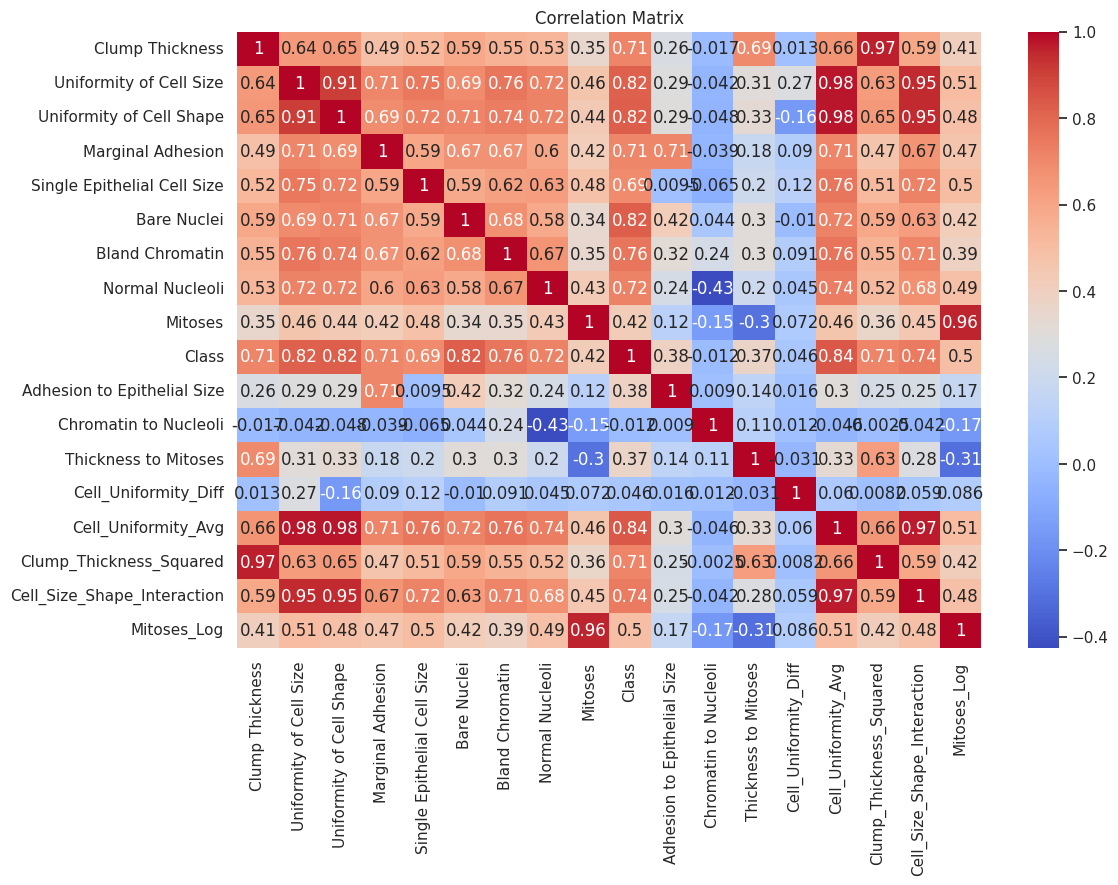

In [122]:
# Display the correlation matrix amongs the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [123]:
#drop column has low correlation every feature has less then 50% chance
df=df.drop(columns=['Chromatin to Nucleoli','Cell_Uniformity_Diff','Mitoses_Log','Thickness to Mitoses','Adhesion to Epithelial Size'])


In [124]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class', 'Cell_Uniformity_Avg',
       'Clump_Thickness_Squared', 'Cell_Size_Shape_Interaction'],
      dtype='object')

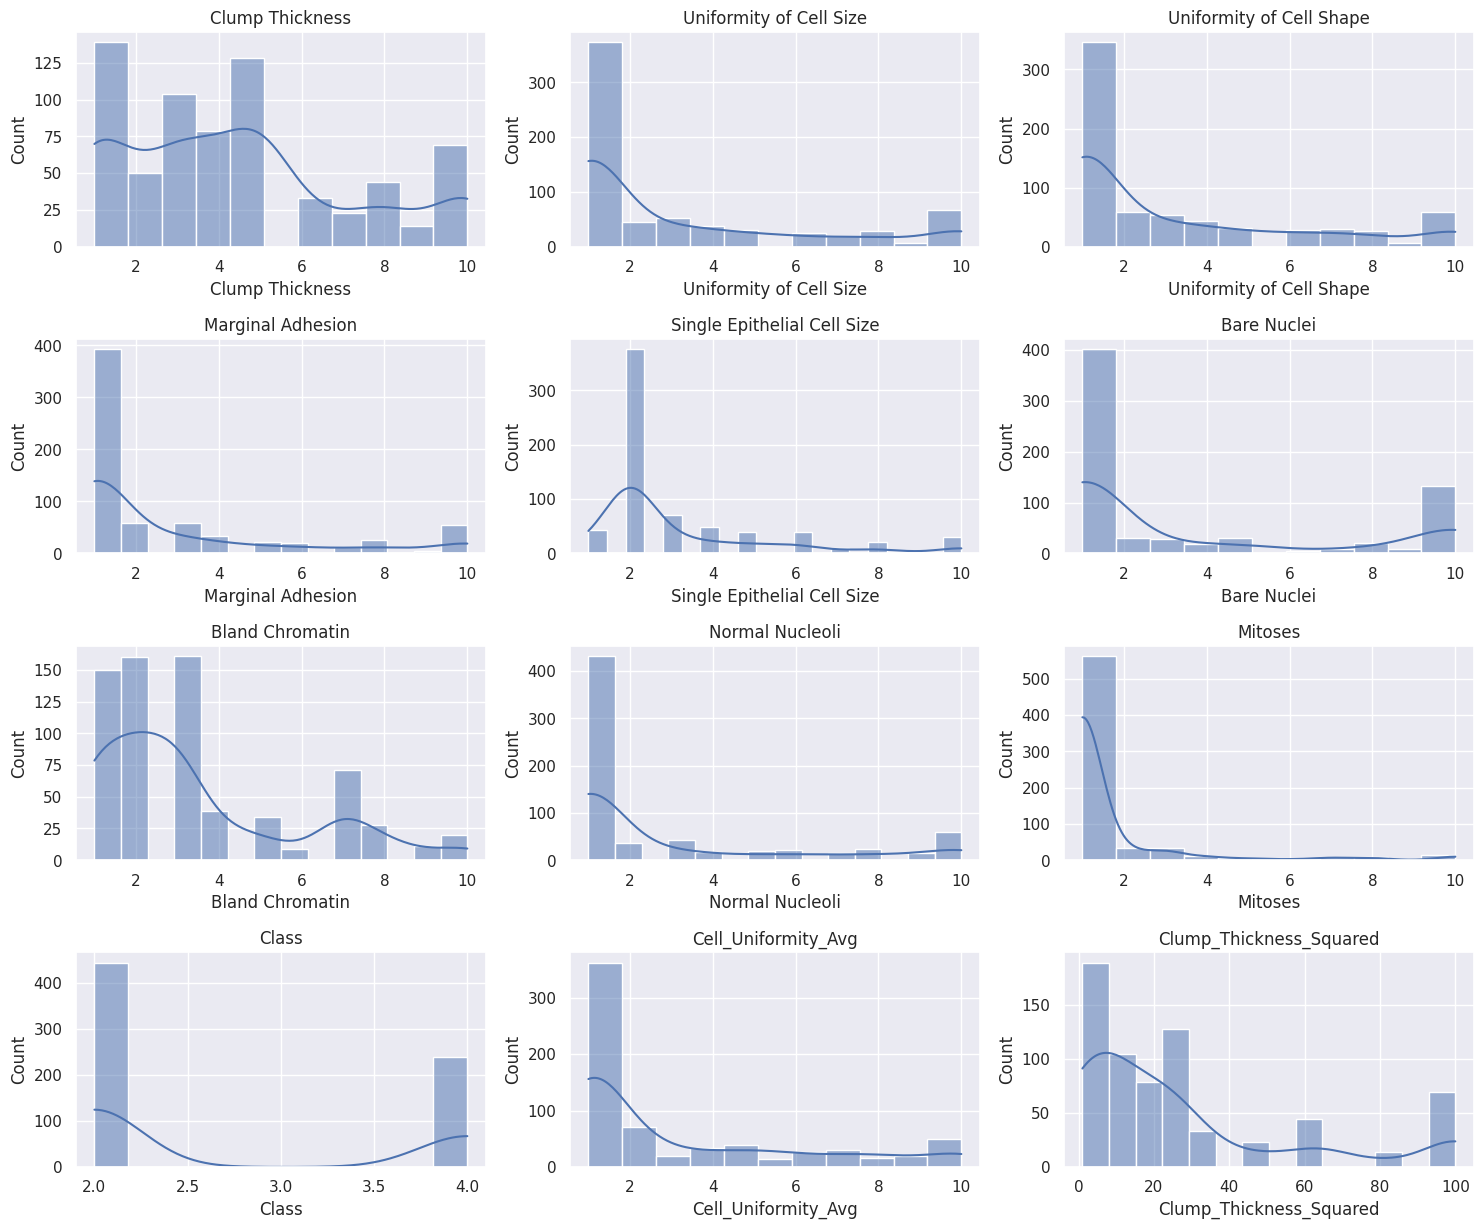

In [125]:
# Univariate Analysis with adjusted grid size
plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

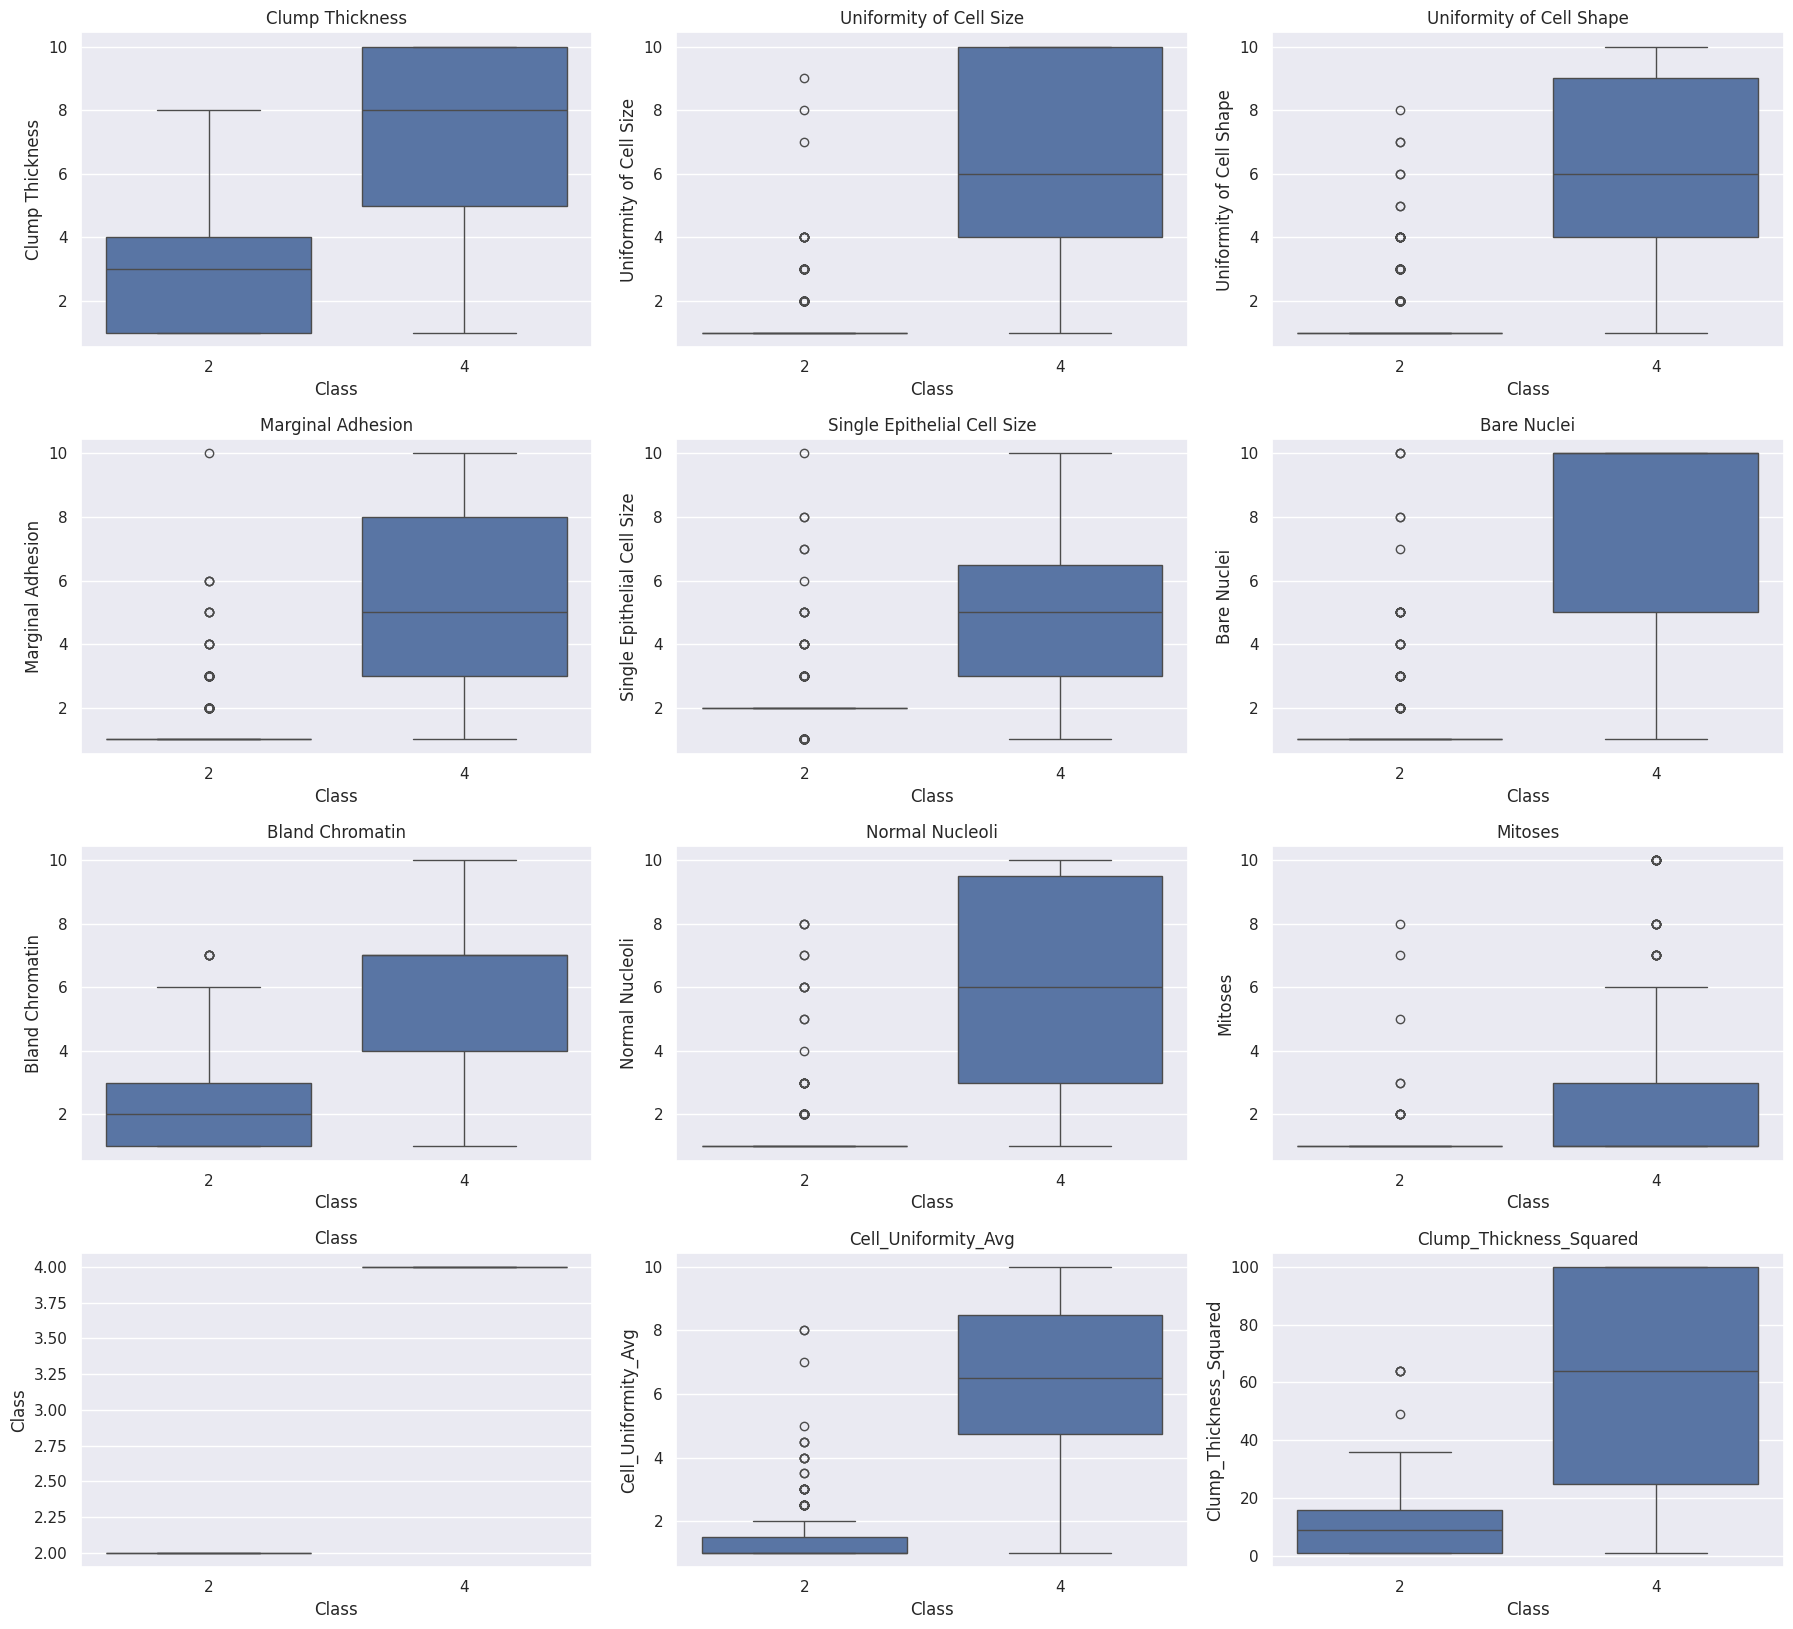

In [126]:
# Box plots and violin plots for each feature grouped by class
plt.figure(figsize=(18, 20))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

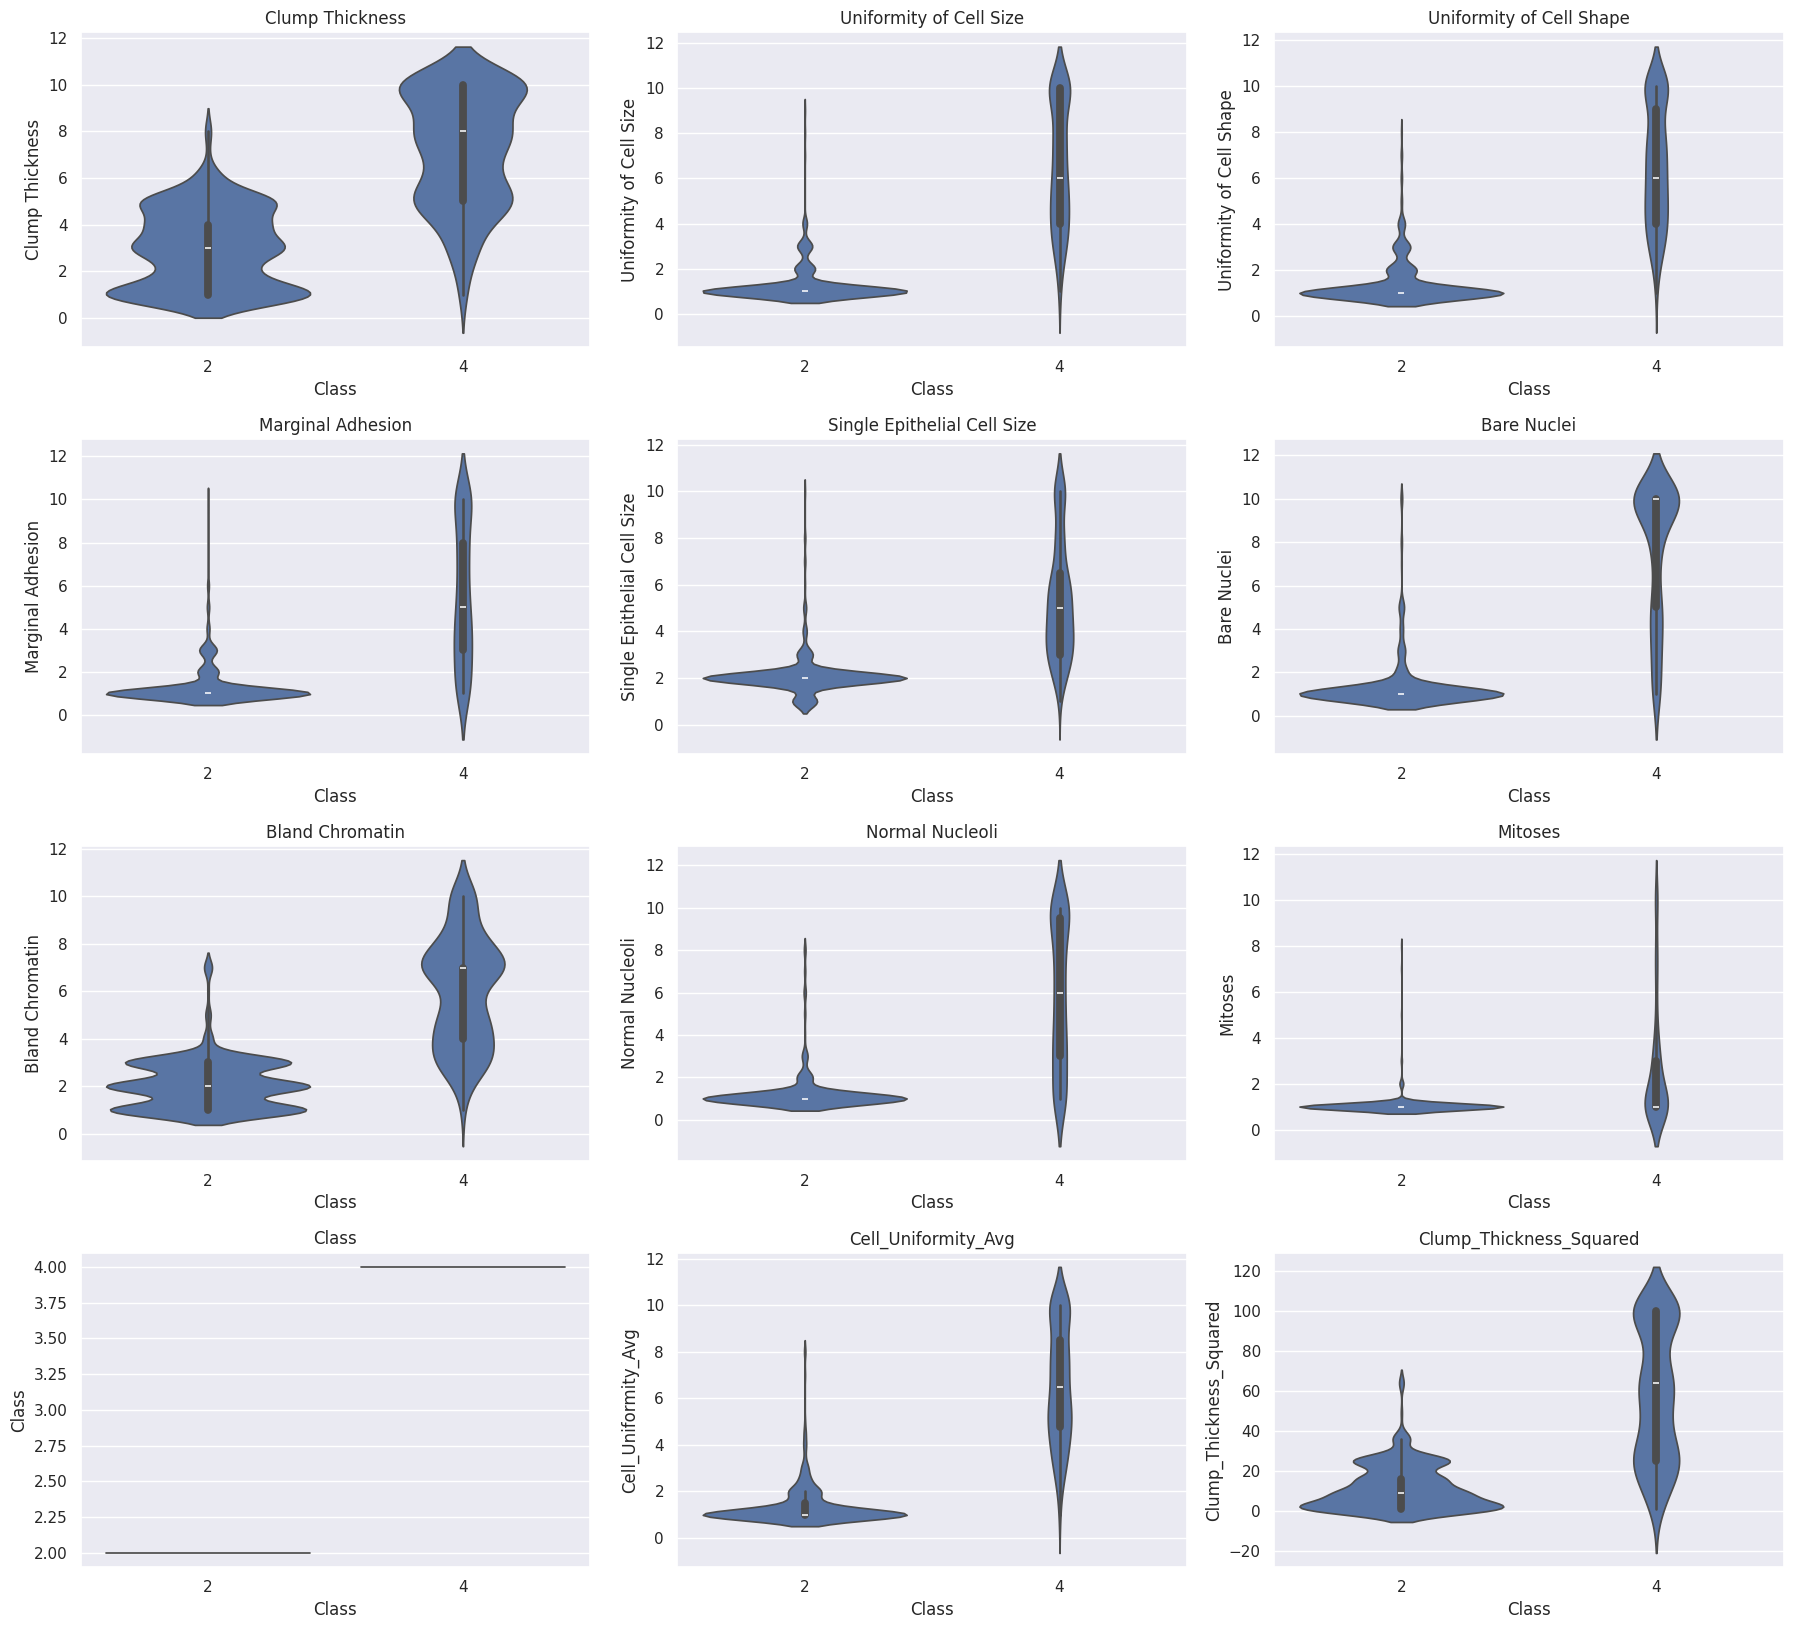

In [127]:
plt.figure(figsize=(18, 20))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    sns.violinplot(x='Class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

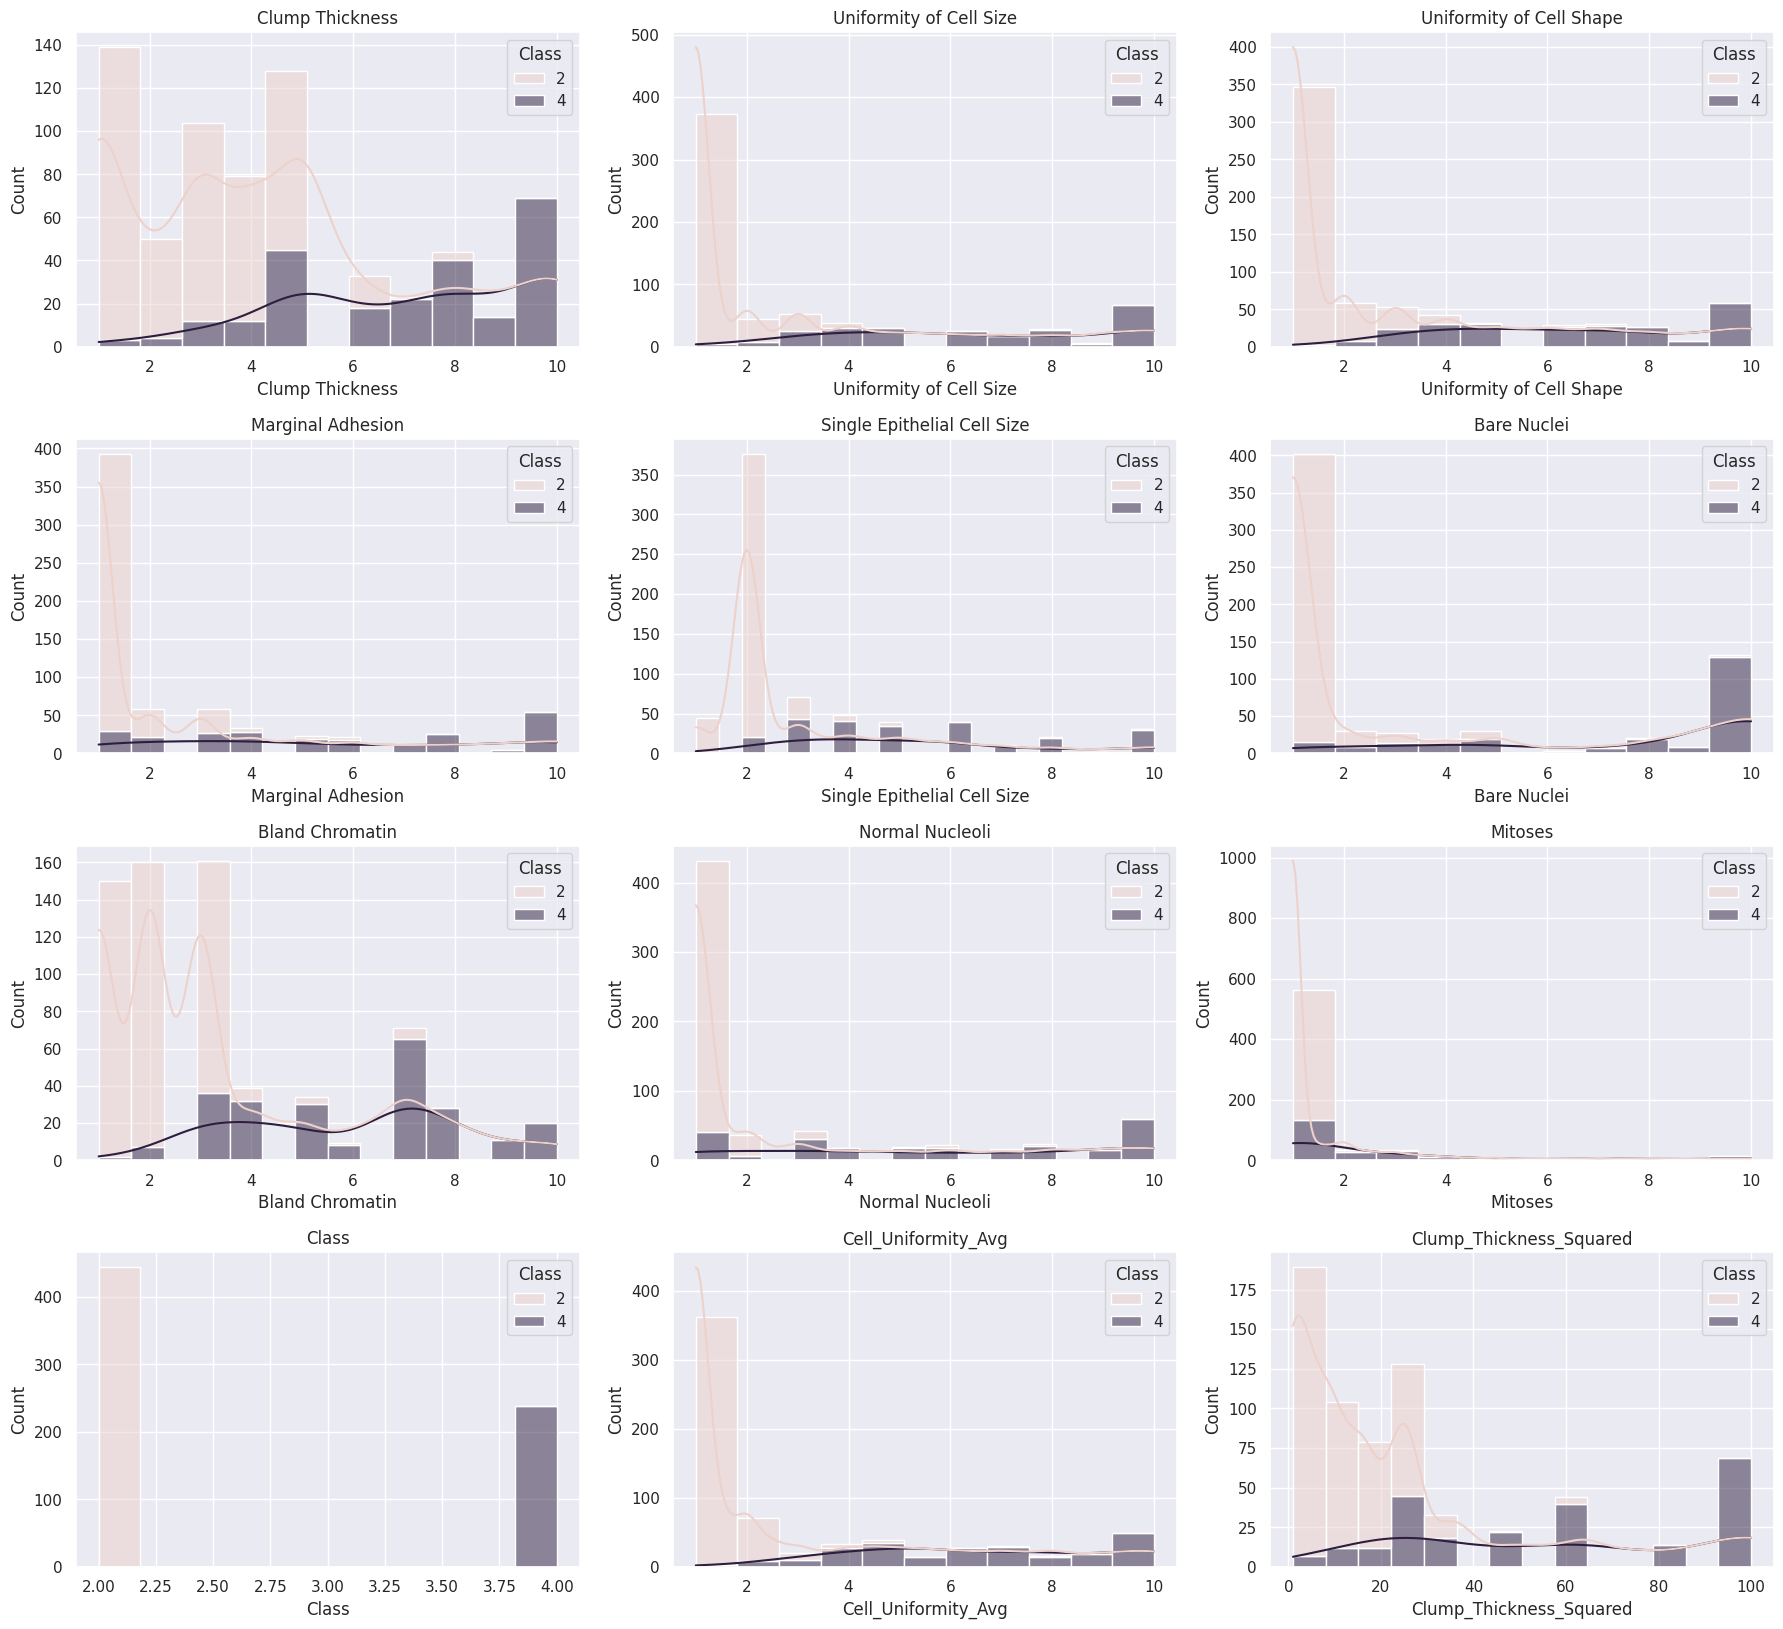

In [128]:
# Distribution plots for each feature grouped by class
plt.figure(figsize=(18, 20))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    sns.histplot(df, x=col, hue='Class', multiple='stack', kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

##***spliting data X,y using target column***

In [129]:
# Prepare data for modeling
X = df.drop(columns=['Class'])
y = df['Class']

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Building model
1.Logistic Regression\
2.Support Vector Machine (SVM)\
3.K-Nearest Neighbors (KNN)\
4.Decision Tree\
5.Random Forest\
6.Gradient Boosting

In [140]:
# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [141]:
# Train and evaluate each model using For loop
results = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results.append({'Model': model_name, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.9635
ROC AUC: 0.9980
Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
 [[78  1]
 [ 4 54]]


Model: SVM
Accuracy: 0.9708
ROC AUC: 0.9972
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97        79
           4       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion Matrix:
 [[78  1]
 [ 3 55]]


Model: KNN
Accuracy: 0.9562
ROC AUC: 0.9901
Classification Report:
               precision    recall  f1-score   

In [149]:
# Convert results to a DataFrame compare the best model
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.963504,0.998036
1,SVM,0.970803,0.997163
2,KNN,0.956204,0.990070
3,Decision Tree,0.948905,0.944238
4,Random Forest,0.948905,0.995089
5,Gradient Boosting,0.948905,0.995417


#svm is the best model now Hyperparameter Tuning it:-

In [154]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

In [156]:
# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

print('Classification Report of the best model:',classification_report(y_test, y_pred))
print('Accuracy of the best model:', accuracy)
print('ROC AUC of the best model:', roc_auc)

Classification Report of the best model:               precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Accuracy of the best model: 0.9635036496350365
ROC AUC of the best model: 0.9982540375381929


#Export the model /save model to deploy

In [159]:
import pickle

# Save the model to a file using pickle
with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler to a file using pickle (if using a scaler)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### Next Steps
1. **Model Deployment:**
   - Deploy the saved model using a Flask application.
   - Ensure the model is exposed via a REST API for easy integration with other systems.

2. **Monitoring and Maintenance:**
   - Implement monitoring to track the model's performance over time.
   - Set up alerts to notify in case of performance degradation or other issues.

3. **Future Improvements:**
   - Explore more advanced techniques like ensemble learning or deep learning for potentially better performance.
   - Continuously update the model with new data to maintain its accuracy and relevance.

### Final Thoughts
This project demonstrates a complete workflow from data preprocessing and feature engineering to model training, evaluation, and deployment preparation. By following these steps, we can effectively build a machine learning model for breast cancer detection and deploy it for real-world use. Continuous monitoring and updates will ensure that the model remains accurate and reliable over time.